# Time Series Data

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
from vega_datasets import data
df = data.sf_temps()

## SF Temps

Use the above dataset for the exercises below:

## 1. Resample by the day and take the average temperature. 

In [3]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
# obtain columns and rows
df.shape

(8759, 2)

In [5]:
# identify missing values
df.isnull().sum()

temp    0
date    0
dtype: int64

In [6]:
# reset index to date/time
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [7]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


<AxesSubplot:xlabel='date'>

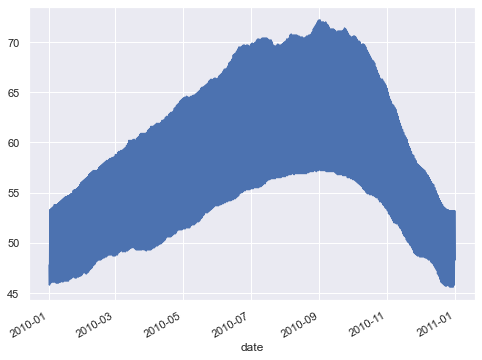

In [8]:
# plot distribution for an overview
df.temp.plot()

## 1b. Visualize the average temperature over time.

<AxesSubplot:xlabel='date'>

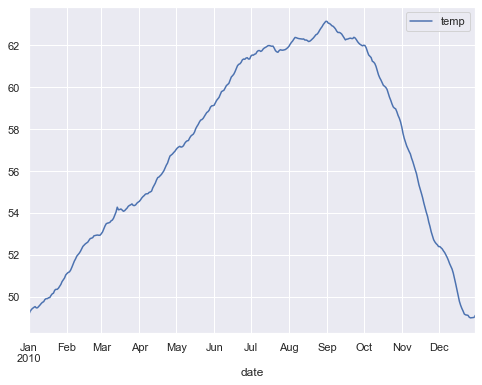

In [9]:
# resample by the day and visualize average temperature overtime
df.resample('D').mean().plot()

## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

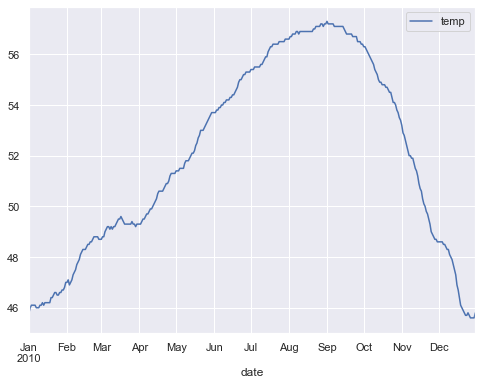

In [10]:
# resample by the day and visualize minimum temperature overtime
df.resample('D').min().plot()

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

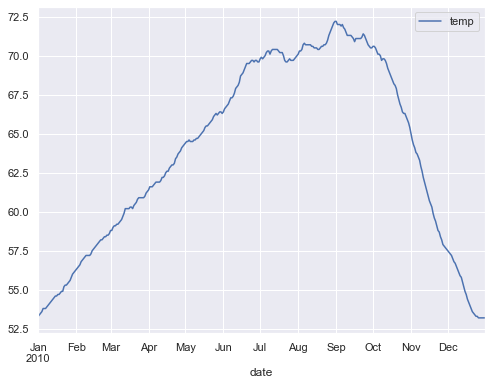

In [11]:
# resample by the day and visualize maximum temperature overtime
df.resample('D').max().plot()

## 4. Which month is the coldest, on average?

In [12]:
df.resample('M').mean().temp.sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

- January is the coldest on average

## 5. Which month has the highest average temperature?

In [13]:
df.resample('M').mean().temp.sort_values(ascending=False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

- September is the highest on average

In [14]:
monthly = df.temp.resample('M').agg(['min', 'max'])
monthly.head(12)

,min,max
date,,
2010-01-31,45.80,56.20
2010-02-28,46.90,58.60
2010-03-31,48.70,61.30
2010-04-30,49.30,64.30
2010-05-31,51.40,66.40
2010-06-30,53.70,69.70
2010-07-31,55.40,70.40
2010-08-31,56.60,72.20
2010-09-30,56.40,72.20


## 6. Resample by the day and calculate the min and max temp for the day 
- (Hint: .agg(['min', 'max'])). 

In [15]:
daily = df.temp.resample('D').agg(['min', 'max'])
daily.head()

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80


Use this resampled dataframe to calculate the change in temperature for the day. 
- Which month has the highest daily temperature variability?

In [16]:
daily['temp_diff'] = daily['max'] - daily['min']
daily['month'] = daily.index.strftime('%m-%b')
daily.groupby('month').temp_diff.max().sort_values()

month
12-Dec    8.90
01-Jan    9.30
02-Feb    9.90
11-Nov   11.80
03-Mar   12.00
04-Apr   13.00
05-May   13.10
10-Oct   14.40
06-Jun   14.80
07-Jul   14.80
09-Sep   14.90
08-Aug   15.00
Name: temp_diff, dtype: float64

## Bonus: 
- Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

<AxesSubplot:xlabel='date'>

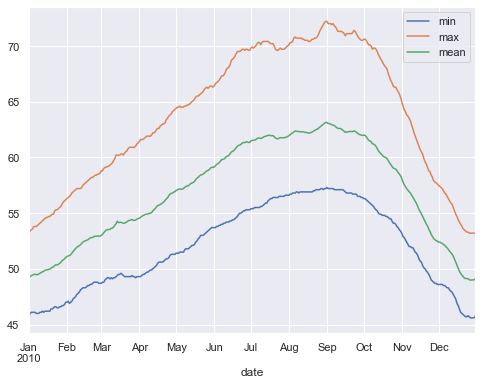

In [17]:
df.temp.resample('D').agg(['min', 'max', 'mean']).plot()

# SEATTLE Precipitation 
Use the dataset to answer the following questions:

In [18]:
from vega_datasets import data
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [19]:
df = df.set_index('date').sort_index()
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


In [20]:
# make year, month columns because the questions are focused on that. 
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
date,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5


1. Which year and month combination has the highest amount of precipitation?

In [21]:
df.resample('M').precipitation.sum().sort_values().tail()

date
2012-03-31   183.00
2012-11-30   210.50
2015-11-30   212.60
2014-03-31   240.00
2015-12-31   284.50
Name: precipitation, dtype: float64

- December 2015 has the highest precipitation

2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:title={'center':'Monthly Precipitation Totals'}, xlabel='date'>

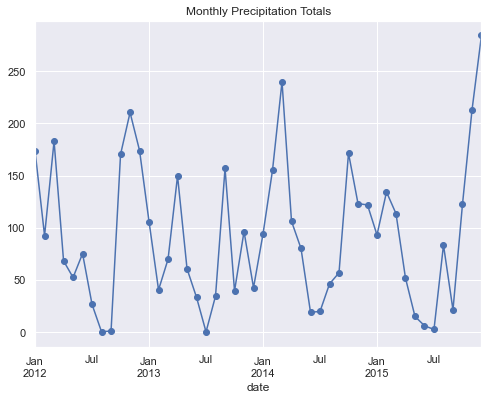

In [22]:
df.resample('M').precipitation.sum().plot(marker='o', title='Monthly Precipitation Totals')

3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:title={'center':'Monthly Wind on Average'}, xlabel='date'>

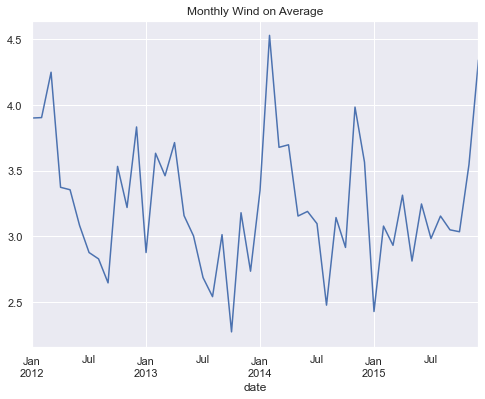

In [23]:
df.resample('M').wind.mean().plot(title = 'Monthly Wind on Average')

4. Which year-month combination is the windiest?

In [24]:
df.resample('M').wind.mean().sort_values().tail()

date
2012-02-29   3.90
2014-11-30   3.98
2012-03-31   4.25
2015-12-31   4.34
2014-02-28   4.53
Name: wind, dtype: float64

- February 2014 was the windiest on average.

5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
df['sunny_days'] = df.weather == 'sun'
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day,sunny_days
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,1,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2,False
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,3,False
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,4,False
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,5,False


In [26]:
df.groupby('year').sunny_days.mean().sort_values()

year
2012   0.32
2015   0.49
2013   0.56
2014   0.58
Name: sunny_days, dtype: float64

- 2014 was the sunniest year

6. In which month does it rain the most?

In [27]:
df.groupby('month').precipitation.sum().sort_values().tail()

month
1    466.00
10   503.40
3    606.20
12   622.70
11   642.50
Name: precipitation, dtype: float64

- November is the month with the most rain

7. Which month has the most number of days with a non-zero amount of precipitation?

In [28]:
df['nonzero_precipitation'] = df.precipitation > 0
df.groupby('month').nonzero_precipitation.sum().sort_values()

month
7     11
8     22
5     34
9     35
6     37
4     59
10    61
1     66
11    71
2     73
3     73
12    81
Name: nonzero_precipitation, dtype: int64

- December has the most number of days with non-zero precipitation.

# Flight Data

In [29]:
df = data.flights_20k()
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [30]:
df = df.set_index('date').sort_index()
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


1. Convert any negative delays to 0.

In [31]:
df.delay = df.delay.clip(lower = 0)
df.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


2. Which hour of the day has the highest average delay?

In [32]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [33]:
df.groupby('hour').delay.mean().sort_values()

hour
5      0.51
6      2.49
7      3.07
8      4.03
9      5.00
10     5.85
11     7.36
12     9.21
14    10.75
13    11.45
15    13.14
17    13.20
16    13.88
18    14.51
19    16.26
20    17.89
21    21.63
22    32.70
23    65.35
0    127.92
1    170.00
3    302.50
Name: delay, dtype: float64

- 3AM has the highest everage delay

3. Does the day of the week make a difference in the delay amount?

In [34]:
df['day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [35]:
df.groupby('day').delay.mean().sort_values()

day
Monday       7.17
Saturday     8.43
Tuesday      9.41
Sunday      10.41
Wednesday   11.03
Thursday    12.82
Friday      17.76
Name: delay, dtype: float64

- Yes, the day of the week makes a differece in the delay amount with Monday having the lowest average delay and Friday having the highest average delay. 

4. Does the month make a difference in the delay amount?

In [36]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [37]:
df.groupby('month').delay.mean().sort_values()

month
March       9.88
January    11.30
February   12.31
Name: delay, dtype: float64

In [38]:
df.index.min(), df.index.max()

(Timestamp('2001-01-01 00:01:00'), Timestamp('2001-03-31 21:30:00'))

- Yes, the month makes a differece in the delay amount with March having the lowest average delay and February having the highest average delay.